In [1]:
# It is used in both classification and regression algorithms.
# The decision tree is like a tree with nodes. The branches depend on a number of factors. 
# It splits data into branches like these till it achieves a threshold value. A decision tree consists of the root nodes,
# children nodes, and leaf nodes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# the required is to predict the 'Species' type out from the data collected
df = pd.read_csv('penguins_size.csv')

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df= df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
# there is an not accept value (.)
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
df[df['island']=='Biscoe'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    80.000000    83.000000
                  mean     44.5    43.307500    47.119277
                  std       NaN     4.177631     4.691000
                  min      44.5    34.500000    37.600000
                  25%      44.5    39.675000    43.800000
                  50%      44.5    44.900000    48.500000
                  75%      44.5    46.500000    50.050000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    80.000000    83.000000
                  mean     15.7    15.191250    16.597590
                  std       NaN     1.718565     1.664696
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.975000    15.350000
                  50%      15.7    14.500000    16.000000
                  75%      15.7    16.275000    17.650000
                  max      15.7    20.700000    21.100000
flipper_length_mm count     1.0    80.000000    83.000000
                  mean    217.0   205.687500   213.289157
                  std       NaN    12.433717    15.011808
                  min     217.0   172.000000   180.000000
                  25%     217.0   197.250000   201.500000
                  50%     217.0   210.000000   219.000000
                  75%     217.0   214.000000   224.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    80.000000    83.000000
                  mean   4875.0  4319.375000  5104.518072
                  std       NaN   659.748885   714.197748
                  min    4875.0  2850.000000  3550.000000
                  25%    4875.0  3818.750000  4737.500000
                  50%    4875.0  4587.500000  5350.000000
                  75%    4875.0  4812.500000  5600.000000
                  max    4875.0  5200.000000  6300.000000

In [12]:
# by comparison , the missing sex cell can be decided to be Female
df.at[336,'sex']='FEMALE'

In [13]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

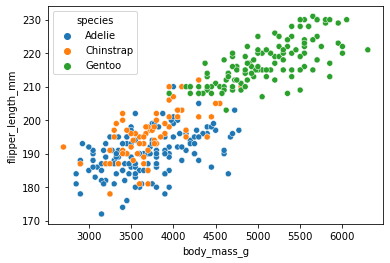

In [14]:
sns.scatterplot(data=df,hue='species',x='body_mass_g',y='flipper_length_mm')

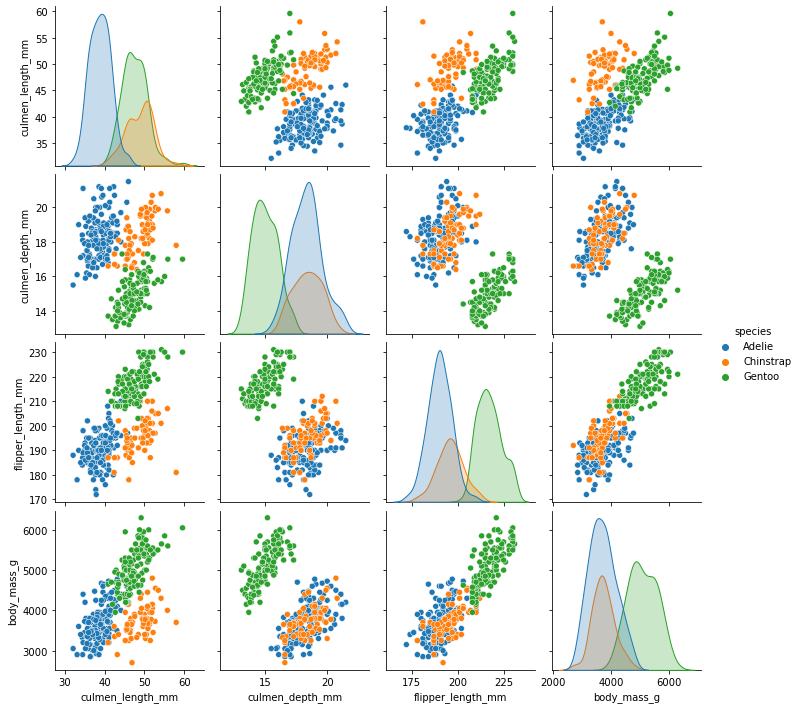

In [15]:
sns.pairplot(data=df,hue='species')

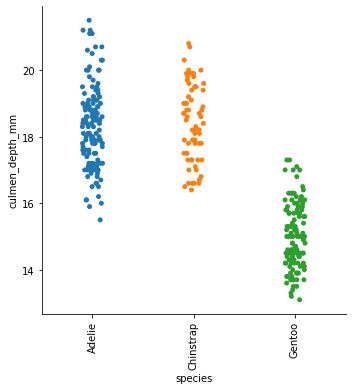

In [16]:
sns.catplot(x='species',y='culmen_depth_mm', data=df)
plt.xticks(rotation=90);

(array([0, 1, 2]),
 [Text(0, 0, 'Adelie'), Text(1, 0, 'Chinstrap'), Text(2, 0, 'Gentoo')])

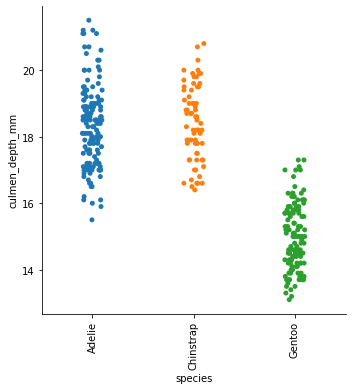

In [17]:
sns.catplot(x='species',y='culmen_depth_mm', data=df)
plt.xticks(rotation=90)

In [18]:
# Decision Tree doesn't support string so there is a need to change the given data to dummies to be able to deal with
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [19]:
y=df['species']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=101)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
pred = model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report , plot_confusion_matrix

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [27]:
# the accuracy is 94 percente 

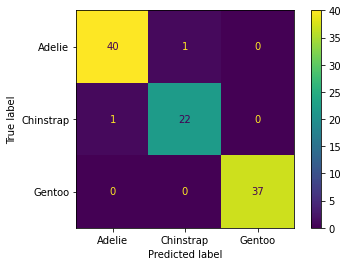

In [28]:
plot_confusion_matrix(model , X_test,y_test)

In [29]:
model.feature_importances_

array([0.32591819, 0.04203954, 0.53120101, 0.        , 0.0681854 ,
       0.01017467, 0.02248118])

In [30]:
pd.DataFrame(index=X.columns , data=model.feature_importances_ ,
             columns=['feature importance']).sort_values('feature importance')

,feature importance
body_mass_g,0.000000
island_Torgersen,0.010175
sex_MALE,0.022481
culmen_depth_mm,0.042040
island_Dream,0.068185
culmen_length_mm,0.325918
flipper_length_mm,0.531201


In [31]:
# from this table 'flipper_length_mm' is the most effective value

In [32]:
from sklearn.tree import plot_tree

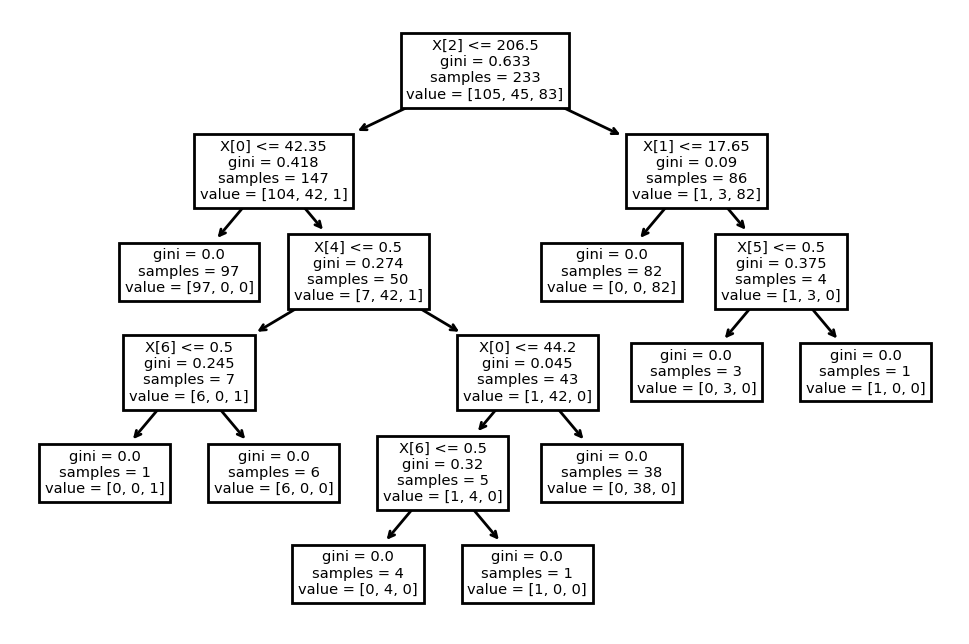

In [33]:
plt.figure(dpi=200)
plot_tree(model);

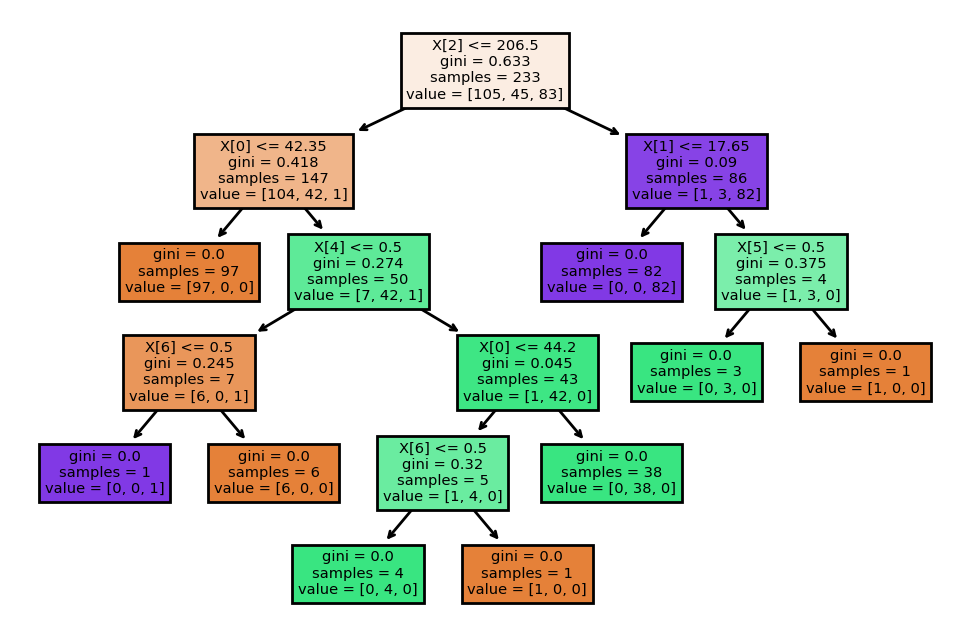

In [34]:
plt.figure(dpi=200)
plot_tree(model, filled = True);

In [35]:
def model_details(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test,pred))
    plt.figure(dpi=200)
    plot_tree(model, filled = True);

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101



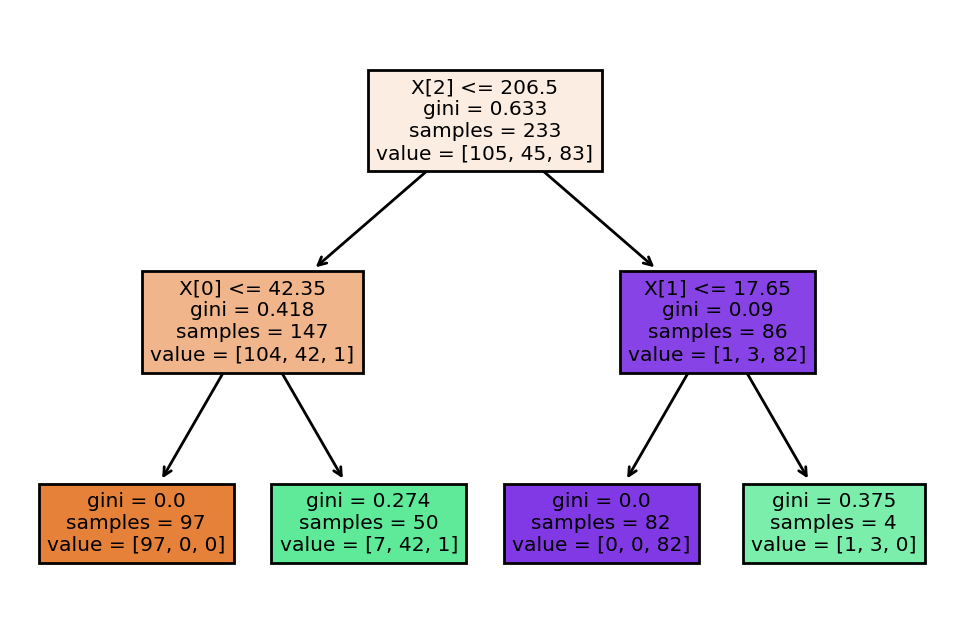

In [36]:
model1= DecisionTreeClassifier(max_depth=2)
model_details(model1)

In [37]:
# same performance (94% for accuracy) but there is clear decrease of system complexity ( max depth = 2)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



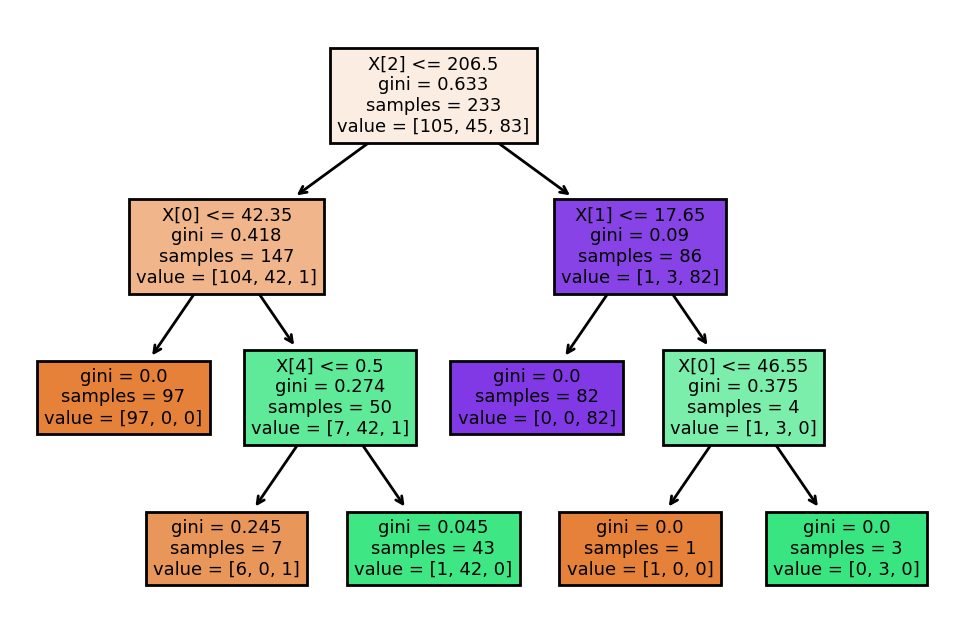

In [38]:
model2= DecisionTreeClassifier(max_depth=3)
model_details(model2)

In [39]:
# system performance increased to 97% accuacy with ( max depth =3 ) 

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



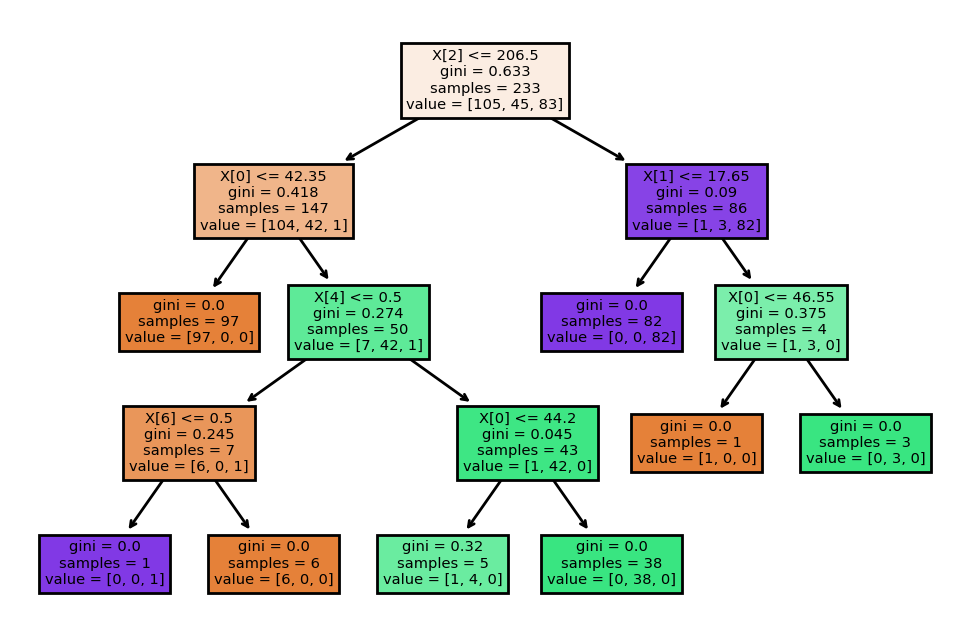

In [40]:
model3= DecisionTreeClassifier(max_depth=4)
model_details(model3)

In [41]:
# system performance increased to 98% accuacy with ( max depth =4 ) 

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



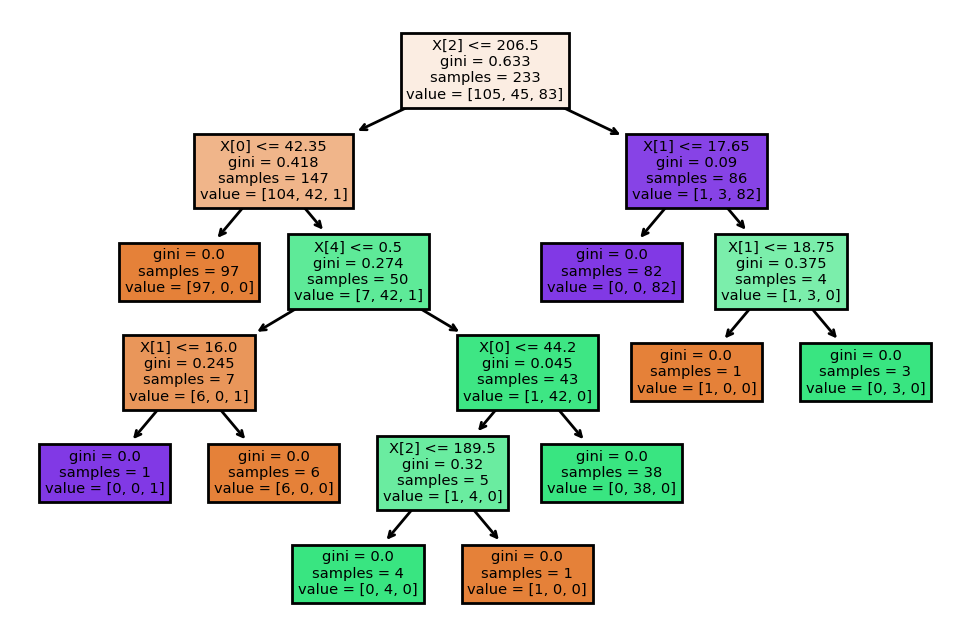

In [42]:
model4= DecisionTreeClassifier(max_depth=5)
model_details(model4)

In [43]:
# with max-depth =5 the system performance decreased to 94% accuracy !! this mean that it is not necessary to get improve in 
# accuracy with increasing the max_depth each time , there is an optimal value to be found
# the system berformance with max_depth= [ 3, 4] better than when max_depth =  5 

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101



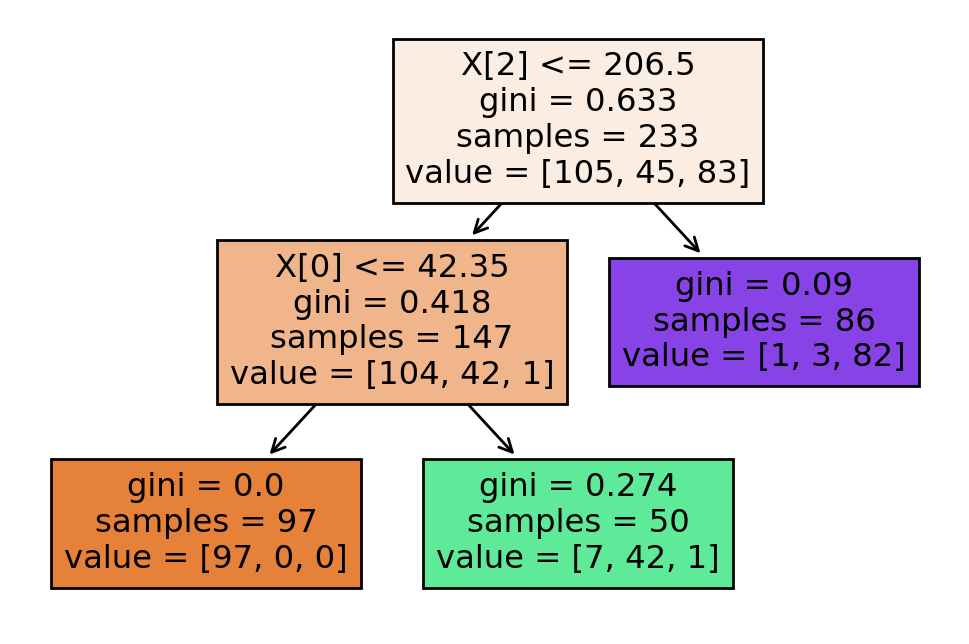

In [44]:
# another parameter can decrease the system complexity is (max_leaf_nodes)
model5= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=3)
model_details(model5)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.95      0.87      0.91        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.95       101
   macro avg       0.95      0.94      0.94       101
weighted avg       0.95      0.95      0.95       101



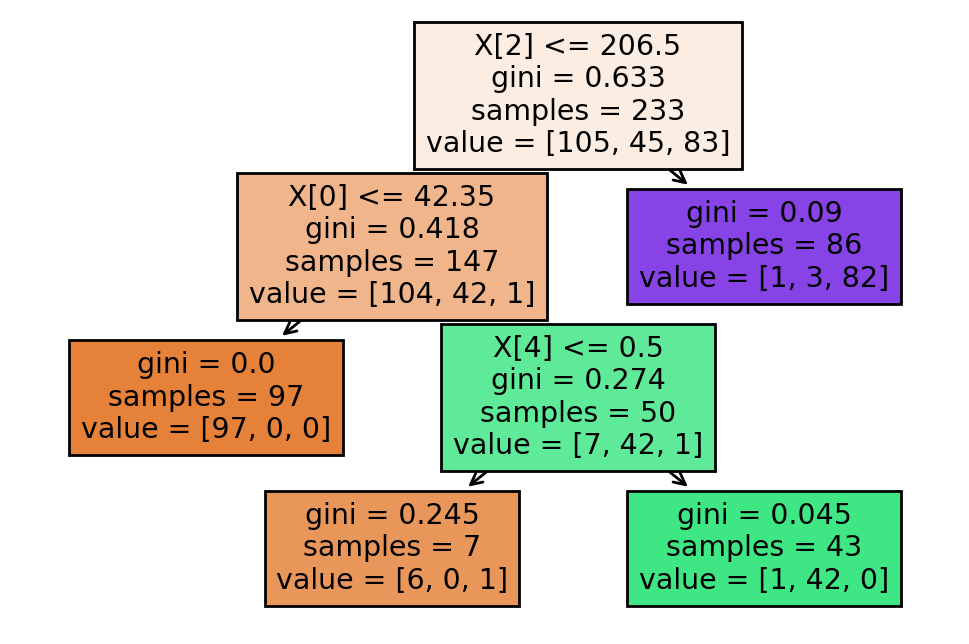

In [45]:
model6= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4)
model_details(model6)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



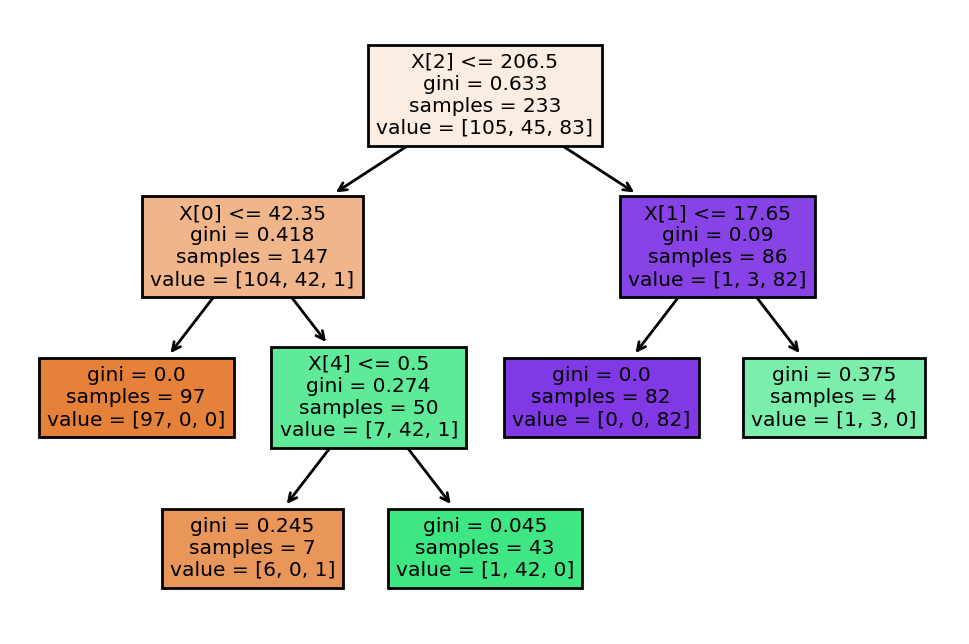

In [46]:
model7= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)
model_details(model7)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



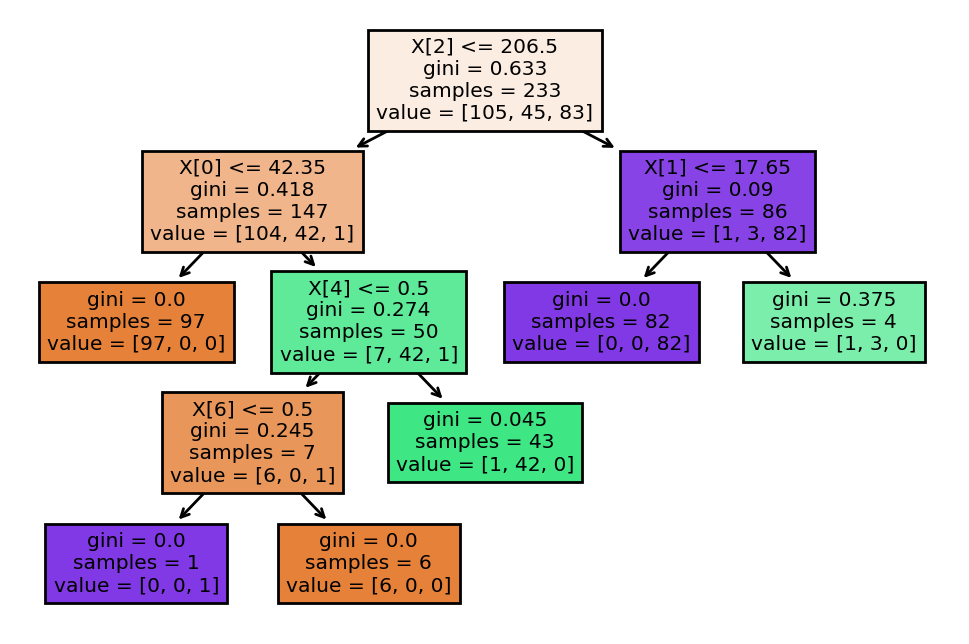

In [47]:
model8= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6)
model_details(model8)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



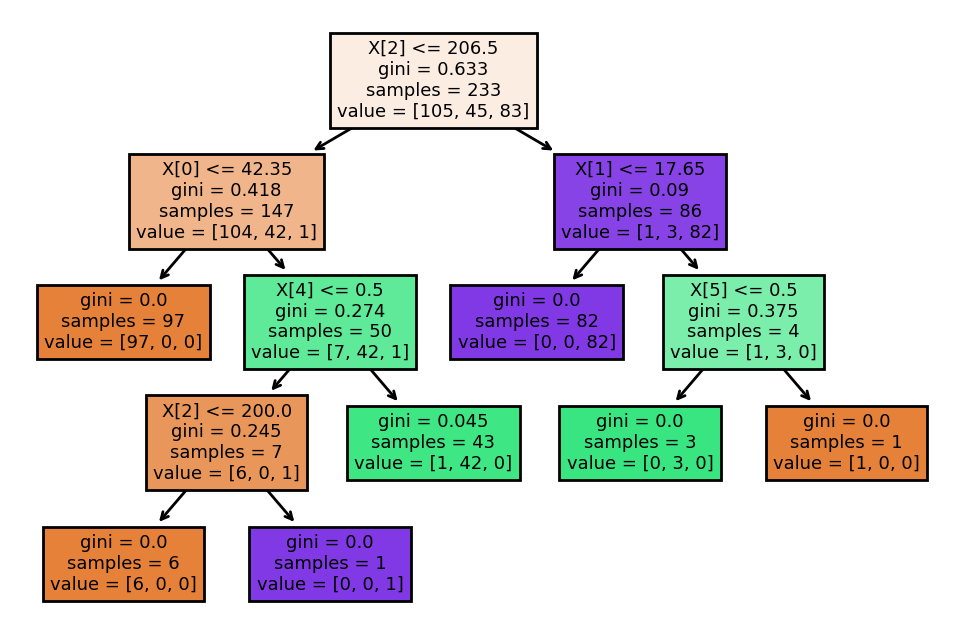

In [48]:
model9= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7)
model_details(model9)

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



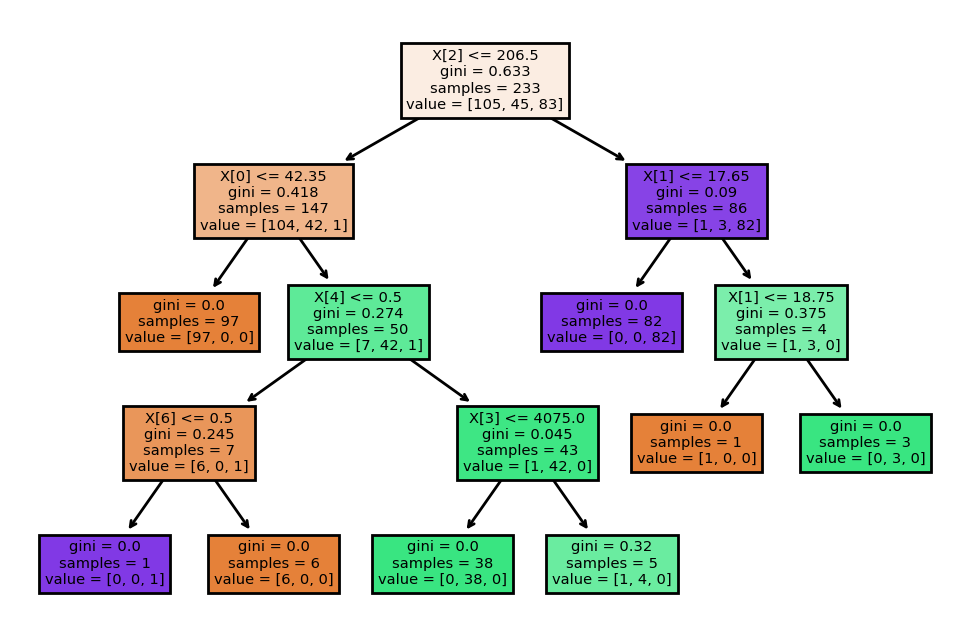

In [49]:
model10= DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8)
model_details(model10)

In [50]:
# again same things happened ---- reaching a point gives maxamim performance by( max_leaf_nodes=7)

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.91      0.95        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.97      0.98       101
weighted avg       0.98      0.98      0.98       101



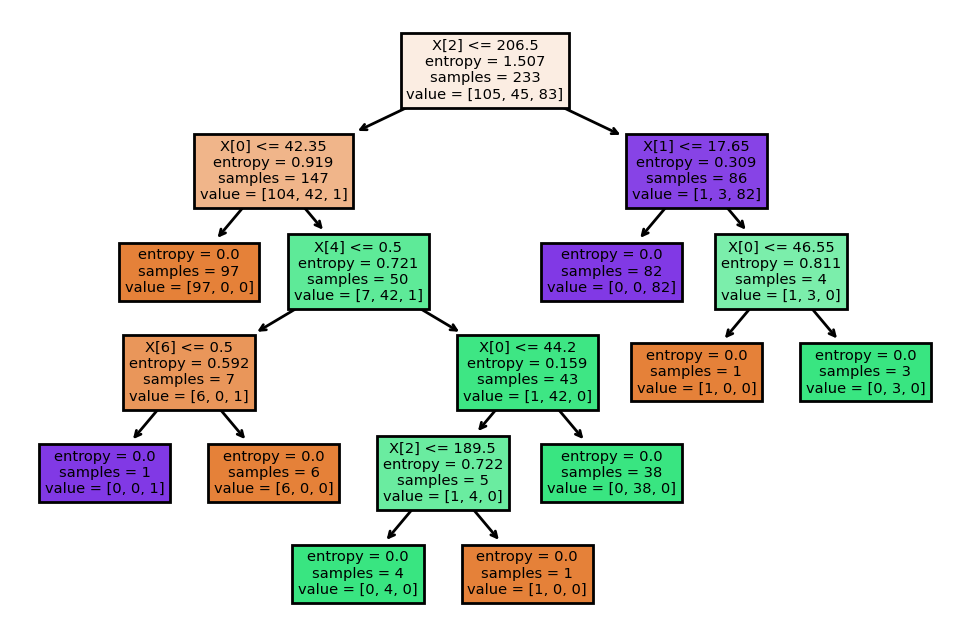

In [51]:
model11= DecisionTreeClassifier(criterion='entropy')
model_details(model11)
#criterion{“gini”, “entropy”}, default=”gini”